In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

For more reproducible code, we will define a variable for our data.

In [3]:
data= females['Height']

Let's also define the low and high values of the range that we are interested in. Since we are finding the probability of a female having height between 66.0 and 70.0 inches, the low end is 66.0 and the high end is 70.0.

In [4]:
low_end= 66.0
high_end= 70.0

Plot the probability distribution and visualize the range we are interested in.

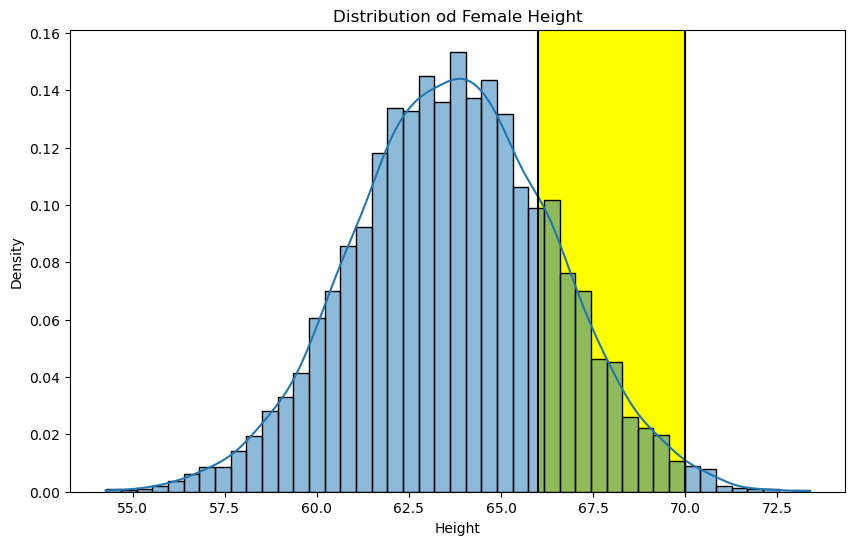

In [8]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density', kde=True)
ax.set_title('Distribution od Female Height')
ax.axvline(low_end, color='black')
ax.axvline(high_end, color= 'black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

### Plot the probability distribution with a KDE line and annotate the mean.

Let' define some important descriptive stats (mean, std, min, max)

In [9]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

Note in the code below that we are specifying  "cumulative = False".  This is the default for sns.histplot(), but we are highlighting it here.

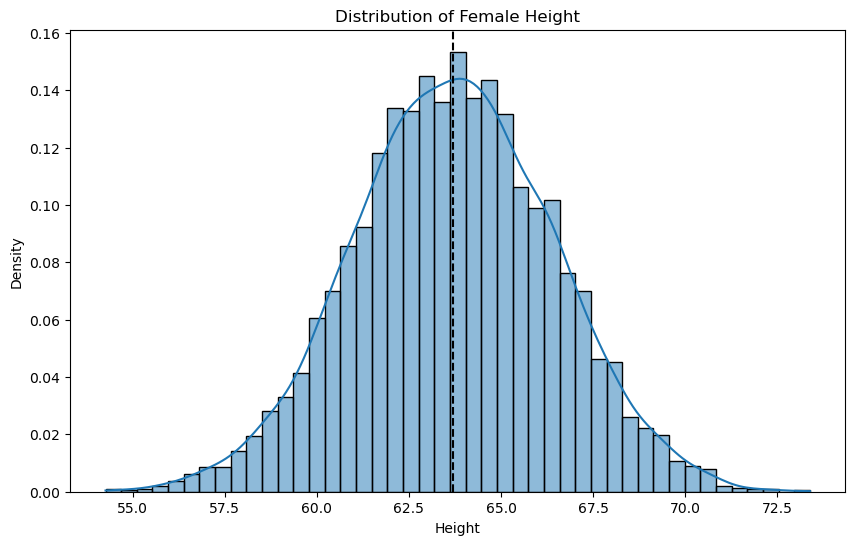

In [10]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

## Introducing Cumulative Distribution Plots (CDF)

To calculate the area under the curve between two values with python, we can leverage another form of our PDF called the cumulative distribution function (CDF).

First all of the values are sorted from lowest to highest, and we keep adding one value at a time to our total.
The CDF is like a running total of the % of the distribution that occurs to the left of each x value.

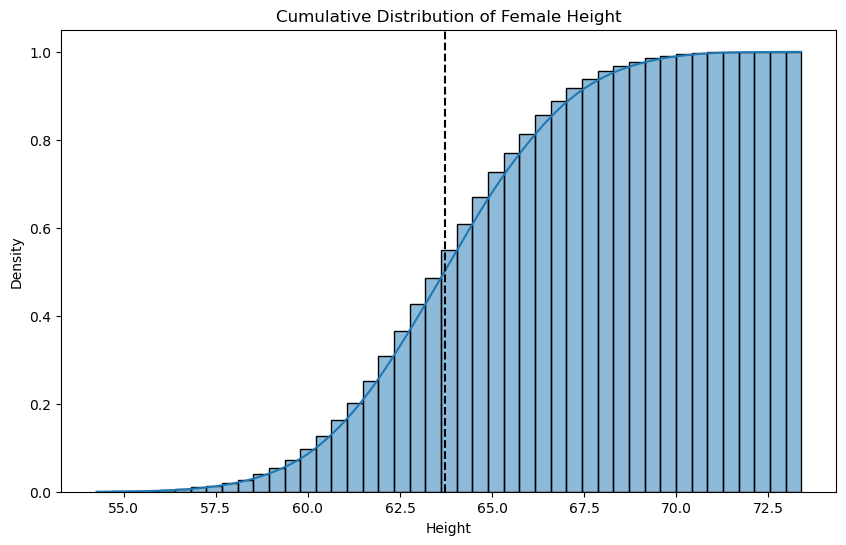

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

-At the minimum height (54.26313333), the cumulative probability is nearly 0.

-As we increase x to add the next tallest people, the cumulative probability increases.

-By definition, we have 50% of the cumulative distribution when x= our mean of 63.71.

-As above average heights are included, the cumulative distribution continues to increase beyond 50%

-At the tallest height (73.38958587), the cumulative probability includes everyone and is 1 (100% of the people)

-Notice that the Cumulative Distribution will always sum up to one as we move from the left to right on our x-axis.  

## Making the normal pdf and cdf

While the height data is pretty close to being normal, before we can do our calculations, we will create the pdf and cdf for the normal curve that has the same mean and standard deviation as our data.
When using creating the pdf function/curve for any normal distribution, we will use stats.norm.pdf. It accepts the following parameters:

-x: range and spacing of x 

-loc: the mean (defaults to 0)

-scale: the standard deviation. (default =1 )

In [12]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

Note that we had previously defined mean and standard deviation.

In [13]:
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

Plot our data with the normal pdf

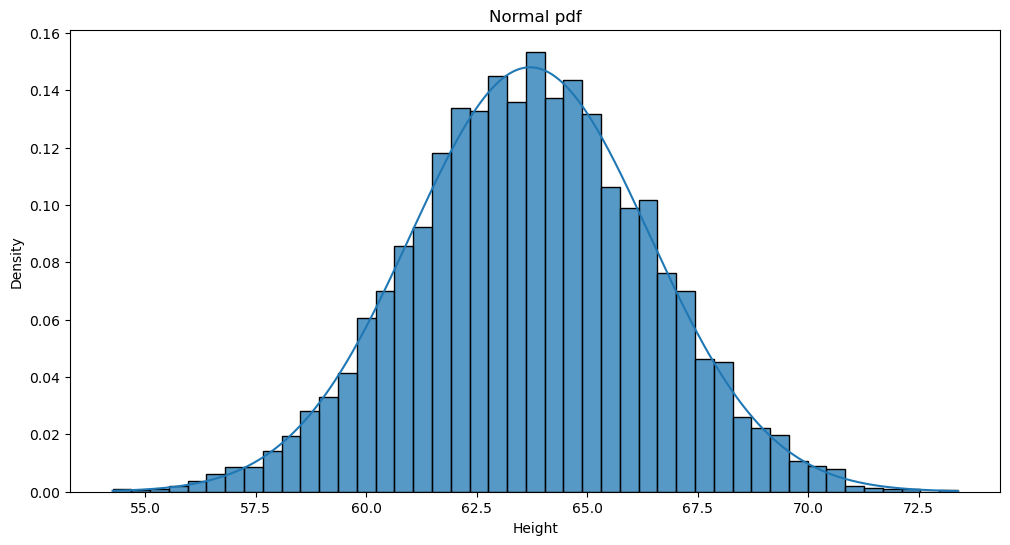

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

We can also create the cdf for normal data with our mean and std.

In [15]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

Let's plot the normal cdf.

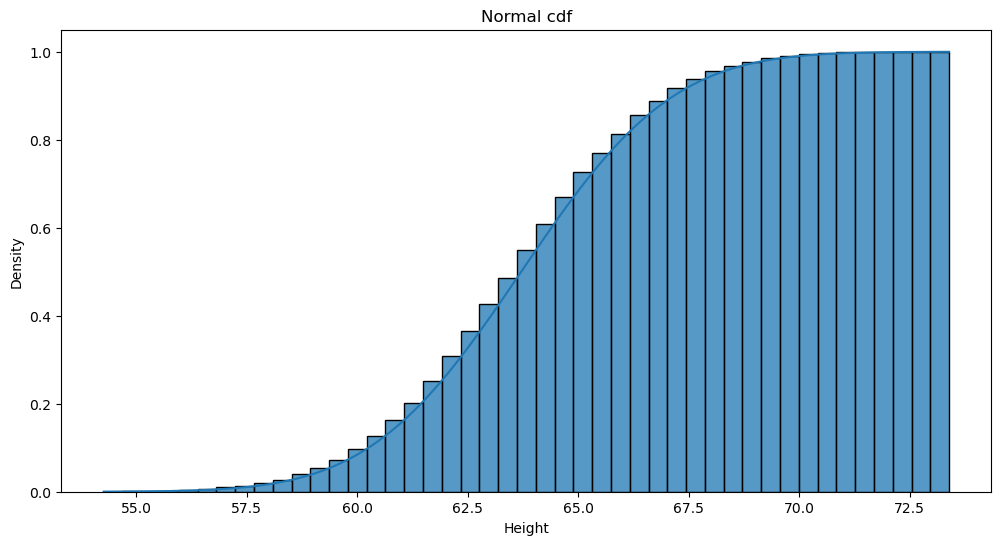

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.set_title('Normal cdf');

Now, let's consider the range of values we are interested (female heights between 60 and 77 inches)
We have previously defined our "low end' and "high end"

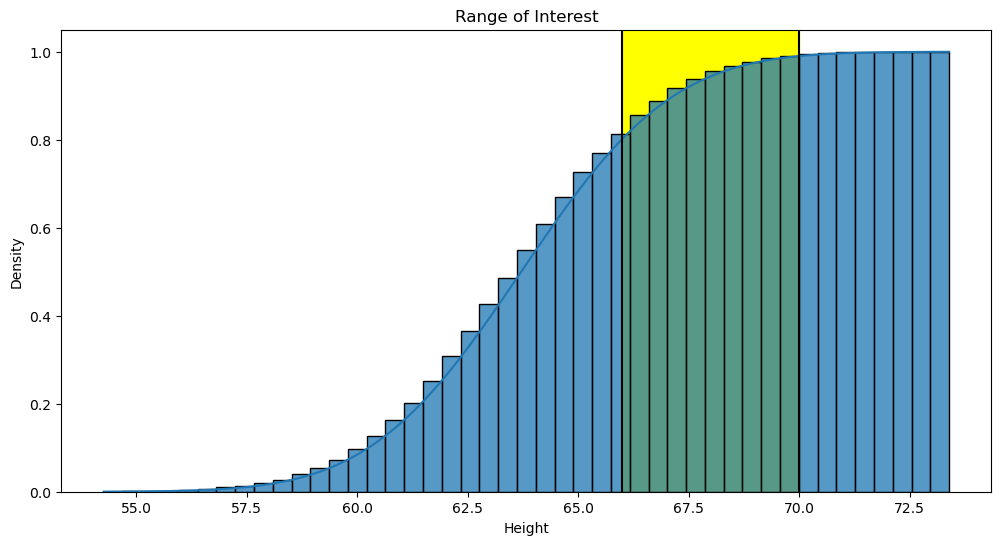

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

Now that we have explored the concept visually, we just need to do a little subtraction to get the area of our range.

In [19]:
## we subtract to find the probability of a value occurring in the range
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.1878921154347699

We found that there is a .188 probability (or a 18.8% chance) of a female having a height between 66 and 70 inches.  Behold the power of the CDF!

## Probability of Less than or Greater than a Value

Instead of finding the probability of a specific range, we may instead want to know the probability of a value being less than or greater than a particular value.

For example, if we wanted to calculate the probability of the height being less than 65 inches, we don't need to subtract.

In [20]:
stats.norm.cdf(65, loc=mean,scale=std)

0.6840089832900467

If we wanted to calculate the probability of the height 65 inches or greater, we subtract from 1.

In [21]:
1 -stats.norm.cdf(65, loc=mean,scale=std)

0.31599101670995333

## the ranges have you twick the formula. 66 to 70 the original (19),
for any thing less than 65  use stats.norm.cdf(20), for anything higher than 65 use -stats.norm.cdf(21)